<a href="https://colab.research.google.com/github/SurajPatidar201198/Iris-Dataset/blob/master/Text_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.num_examples #these will show you no. of training images

55000

In [9]:
mnist.test.num_examples #these will show you no. of testing images

10000

In [11]:
mnist.validation.num_examples #these will show u no. of validation images

5000

**Visualizing data**

---



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mnist.train.images.shape #it will give you (55000,784). 55000 is the no. og bytes and 784 is that 28*28

(55000, 784)

In [15]:
mnist.train.images[1].shape #it will give you the shape of first image

(784,)

In [16]:
mnist.train.images[1] #looking our first image  most of the parts are 0 because they are blank

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

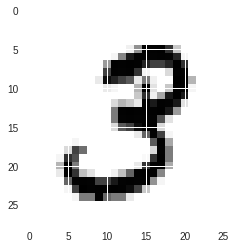

In [19]:
'''if you want to see the handwritten image then use the below code'''

plt.imshow(mnist.train.images[1].reshape(28,28))

In [21]:
mnist.train.images[1].max() #these is to check what is the maximum and minimum value of the pixel of image[1]

1.0

In [23]:
mnist.train.images[1].min() #to check minimum pixel of an image

0.0

# **Create a Model**

In [0]:
x=tf.placeholder(tf.float32,shape=[None,784])

In [0]:
W=tf.Variable(tf.zeros([784,10]))

In [0]:
b=tf.Variable(tf.zeros([10]))

In [0]:
#creating the graph

y=tf.matmul(x,W)+b

## **Loss and Optimizer**

In [0]:
y_true=tf.placeholder(tf.float32,[None,10]) # these is our second placeholder which have values in the form of 10 digit array and since we have said "one_hot encode"  the value which is one is the output

### **Cross Entropy**
These is the loss function


In [30]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train=optimizer.minimize(cross_entropy) #these is the training process which is to minimize the cross entropy which is nothing but the loss function or cost function

## ** Creating the Session**

In [0]:
init=tf.global_variables_initializer() # init is here a node which initializing all our varibales and placeholders

In [36]:
 with tf.Session() as sess:
    sess.run(init)
    
    #train the model for 1000 steps on the training set
    
    for step in range(1000): #these runs the training for thousand iterations
      
      batch_x,batch_y=mnist.train.next_batch(100) #images are taken in batches here we are taking 100 images at a time
      
      sess.run(train,feed_dict={x:batch_x,y_true:batch_y }) 
      
    #Test the trained model
    
    matches= tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc= tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    

0.9207
